In [1]:
import keras
import numpy as np
#from keras import optimizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv2D,Input,Dense,Activation,MaxPooling2D,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# Initialising the CNN
classifier=Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPooling2D(2,2))
classifier.add(Conv2D(128,(3,3),activation='relu'))
classifier.add(MaxPooling2D(2,2))
classifier.add(Dropout(0.5))
classifier.add(Conv2D(512,(3,3),activation='relu'))
#classifier.add(Dropout(0.2))
classifier.add(Conv2D(512,(3,3),activation='relu'))
classifier.add(MaxPooling2D(2,2))
classifier.add(Flatten())
classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(3,activation='sigmoid'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 512)       590336    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 512)       2

In [3]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [4]:
train_data=ImageDataGenerator(rescale=1./255)
test_data=ImageDataGenerator(rescale=1./255)
training_set=train_data.flow_from_directory('/home/bikash/workshop/Deep learning/Covid19-dataset/train',target_size = (64, 64),batch_size = 10)
test_set=test_data.flow_from_directory('/home/bikash/workshop/Deep learning/Covid19-dataset/test',target_size = (64, 64),batch_size = 10)
model = classifier.fit(training_set,epochs = 50,validation_data = test_set)

classifier.save("covid_classifier.h5")
print("Saved model to disk")

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Epoch 1/50
26/26 [==============================] - 21s 825ms/step - loss: 1.0995 - accuracy: 0.4263 - val_loss: 1.0738 - val_accuracy: 0.3939
Epoch 2/50
26/26 [==============================] - 18s 682ms/step - loss: 0.8838 - accuracy: 0.4861 - val_loss: 0.9485 - val_accuracy: 0.8485
Epoch 3/50
26/26 [==============================] - 18s 687ms/step - loss: 0.7665 - accuracy: 0.5657 - val_loss: 0.7177 - val_accuracy: 0.4091
Epoch 4/50
26/26 [==============================] - 18s 685ms/step - loss: 0.7222 - accuracy: 0.5498 - val_loss: 0.8567 - val_accuracy: 0.5152
Epoch 5/50
26/26 [==============================] - 18s 674ms/step - loss: 0.7081 - accuracy: 0.5339 - val_loss: 0.8005 - val_accuracy: 0.5909
Epoch 6/50
26/26 [==============================] - 18s 709ms/step - loss: 0.6703 - accuracy: 0.6375 - val_loss: 0.6788 - val_accuracy: 0.4091
Epoch 7/50
26/26 [==============================] - 18s 680ms

In [5]:
loss,acc = classifier.evaluate(training_set,verbose=0)
print("Loss on train data:",(loss*100))
print("Accuracy on train data:",(acc*100))

Loss on train data: 2.061128243803978
Accuracy on train data: 99.20318722724915


In [6]:
loss,acc = classifier.evaluate(test_set,verbose=0)
print("Loss on test data:",(loss*100))
print("Accuracy on test data:",(acc*100))

Loss on test data: 26.711177825927734
Accuracy on test data: 92.42424368858337


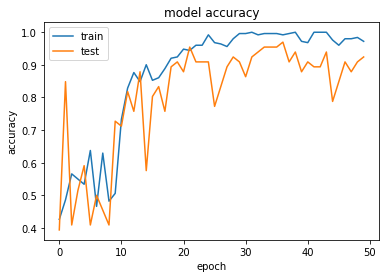

In [7]:
# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

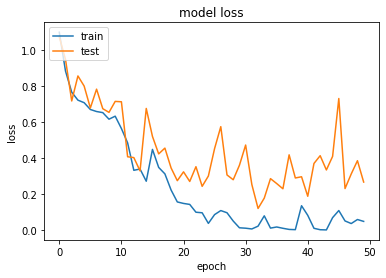

In [8]:
# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
from keras.preprocessing import image

(64, 64, 3)


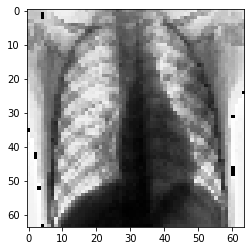

In [16]:
test_image = image.load_img('/home/bikash/workshop/Deep learning/Covid19-dataset/2.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
print(test_image.shape)
plt.imshow((test_image*255).astype(np.uint8))

In [17]:
training_set.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [18]:
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
if result[0][0] == 1:
    prediction = 'Covid'
    print(prediction)
elif result[0][1] == 1:
    prediction = 'Normal'
    print(prediction)
else:
    prediction = 'Viral Pneumonia'
    print(prediction)

Viral Pneumonia
